In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [338]:
# Configura la opción de visualización para mostrar todas las columnas del DataFrame, sin limitaciones.
pd.set_option('display.max_columns', None)

In [339]:
# Cargar los datos desde archivos CSV sobre vuelos de clientes.
df_flight_data = pd.read_csv("Customer Flight Activity.csv")
df_flight_data

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [340]:
# Cargar los datos desde archivos CSV sobre historial de lealtad.
df_loyalty_data = pd.read_csv("Customer Loyalty History.csv")
df_loyalty_data

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


## **FASE 1: Exploración y Limpieza.**
### Exploración Inicial:
- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
- Une los dos conjuntos de datos de la forma más eficiente.

### Limpieza de Datos:
- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos
estén completos.
- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se
presenten de forma coherente.
- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de
datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [341]:
print(df_flight_data.info())  # Información general sobre las columnas y tipos de datos del DataFrame de vuelos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB
None


In [342]:
df_flight_data.duplicated().sum()  # Verificar si existen filas duplicadas en el DataFrame de vuelos.

np.int64(1864)

In [343]:
df_flight_data.drop_duplicates(inplace=True) # Eliminar filas duplicadas del DataFrame de vuelos.

In [344]:
df_flight_data.duplicated().sum() # Verificar si existen filas duplicadas en el DataFrame de vuelos tras eliminarlos.

np.int64(0)

In [345]:
df_flight_data.isnull().sum() # Verificar si existen valores nulos en el DataFrame de vuelos.

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [346]:
df_flight_data.describe().T # Estadísticas descriptivas de las columnas numéricas del DataFrame de vuelos.

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
Year,403760.0,2017.500352,0.500000,2017.0,2017.0,2018.0,2018.0,2018.0
Month,403760.0,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
Flights Booked,403760.0,4.134050,5.230064,0.0,0.0,1.0,8.0,21.0
Flights with Companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
Total Flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
Distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
Points Accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
Points Redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


In [347]:
df_flight_data['Month'].unique() # Verificar los valores únicos de la columna 'Month' para ver que no hay más valores de la cuenta o si hay alguno incorrecto.

array([ 1,  9,  2,  3, 11,  4,  5,  7,  6,  8, 10, 12])

In [348]:
# Verificar si hay algún valor con decimales en la columna "Points Accumulated".
tiene_decimales = df_flight_data['Points Accumulated'] != df_flight_data['Points Accumulated'].astype(int)

# Comprobar si hay al menos un valor con decimales.
print(tiene_decimales.any())  # Si devuelve "True" sí hay algún decimal y "False" si no hay decimales.

True


In [349]:
print(df_loyalty_data.info()) # Información general sobre las columnas y tipos de datos del DataFrame de lealtad.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [350]:
df_loyalty_data.duplicated().sum() # Verificar si existen filas duplicadas en el DataFrame de lealtad.

np.int64(0)

In [351]:
df_loyalty_data.isnull().sum() # Verificar si existen valores nulos en el DataFrame de lealtad.

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [352]:
df_loyalty_data.isnull().sum()/df_loyalty_data.shape[0]*100 # Porcentaje de valores nulos en el DataFrame de lealtad, así se puede más exacto si es mucho o poco.

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [353]:
# Eliminar columnas innecesarias del DataFrame de vuelos. Al tener un alto número de valores negativos y no afectarme en el análisis final, se eliminan.
df_loyalty_data.drop(columns=['Cancellation Year', 'Cancellation Month'], axis=1, inplace=True)

In [354]:
df_loyalty_data.describe().T # Estadísticas descriptivas de las columnas numéricas del DataFrame de lealtad.

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00


In [355]:
df_loyalty_data['Salary']=df_loyalty_data['Salary'].abs() # Convertir los valores negativos de 'Salary' a positivos.
df_loyalty_data['Salary'].min() # Verificar que no haya valores negativos en 'Salary'. El min muestra el valor mínimo de la columna y tras el cambio anterior tiene que ser un número positivo.

np.float64(9081.0)

In [356]:
media_salary = df_loyalty_data['Salary'].mean() # Calcular la media de la columna 'Salary'.
df_loyalty_data['Salary'] = df_loyalty_data['Salary'].fillna(media_salary) # Rellenar los valores nulos en 'Salary' con la media.

Salary - Se reemplaza por la mediana de los salarios:

Porque "Salary" representa el ingreso anual estimado del cliente.
Si hay valores nulos, no se sabe cuánto gana ese cliente.
En vez de eliminar esos clientes o asignarles 0 (lo que podría alterar los datos), se les asigna la mediana de los salarios existentes.

Mejor mediana que promedio porque:
La mediana es menos sensible a valores extremos (por ejemplo, un cliente con un salario muy alto o muy bajo).
Si usáramos el promedio, unos pocos salarios extremadamente altos o bajos podrían distorsionar el valor asignado.
La mediana representa mejor el salario típico de los clientes.

In [357]:
df_loyalty_data.isnull().sum() # Verificar si existen valores nulos y las columnas existentes en el DataFrame de lealtad tras los cambios.

Loyalty Number      0
Country             0
Province            0
City                0
Postal Code         0
Gender              0
Education           0
Salary              0
Marital Status      0
Loyalty Card        0
CLV                 0
Enrollment Type     0
Enrollment Year     0
Enrollment Month    0
dtype: int64

In [358]:
# Verificar si hay algún valor con decimales en la columna "Salary".
tiene_decimales = df_loyalty_data['Salary'] != df_loyalty_data['Salary'].astype(int)

# Comprobar si hay al menos un valor con decimales.
print(tiene_decimales.any())  # Si devuelve "True" sí hay algún decimal y "False" si no hay decimales.

True


In [359]:
# Verificar si hay algún valor con decimales en la columna "CLV".
tiene_decimales = df_loyalty_data['CLV'] != df_loyalty_data['CLV'].astype(int)

# Comprobar si hay al menos un valor con decimales.
print(tiene_decimales.any())  # Si devuelve "True" sí hay algún decimal y "False" si no hay decimales.

True


In [360]:
# Limpiar espacios en las columnas.
for dataframe in [df_flight_data, df_loyalty_data]: # Itera sobre ambos DataFrames.
    for columna in dataframe.columns:
        if dataframe[columna].dtype == "object": # Verifica si la columna es de tipo objeto.
            dataframe[columna] = dataframe[columna].str.title().str.strip() # Convierte el texto a formato título y elimina espacios al principio y al final.

In [361]:
df_loyalty_data['Gender'].unique() # Muestra los valores únicos de la columna "Gender".

array(['Female', 'Male'], dtype=object)

In [362]:
df_loyalty_data['Education'].unique() # Muestra los valores únicos de la columna "Education".

array(['Bachelor', 'College', 'Master', 'High School Or Below', 'Doctor'],
      dtype=object)

In [363]:
df_loyalty_data['Marital Status'].unique() # Muestra los valores únicos de la columna "Marital Status".

array(['Married', 'Divorced', 'Single'], dtype=object)

In [364]:
df_loyalty_data['Loyalty Card'].unique() # Muestra los valores únicos de la columna "Loyalty Card".

array(['Star', 'Aurora', 'Nova'], dtype=object)

In [365]:
df_loyalty_data['Enrollment Type'].unique() # Muestra los valores únicos de la columna "Enrollment Type".

array(['Standard', '2018 Promotion'], dtype=object)

In [366]:
# Unir los dos DataFrames a través de la columna 'Loyalty Number'.
data_combinado = pd.merge(df_flight_data, df_loyalty_data, on="Loyalty Number", how="left") # Merge de los DataFrames a través de la clave común por unión interna.
# Solo se incluyen las filas donde el "Loyalty Number" esté presente en ambos DataFrames. Si un registro está en uno de los DataFrames pero no en el otro, se descarta.
data_combinado

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.000000,Married,Aurora,7919.20,Standard,2016,8
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,79359.340907,Single,Nova,2887.74,Standard,2013,3
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,79359.340907,Divorced,Nova,2838.07,Standard,2016,7
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.000000,Married,Star,4170.57,Standard,2015,8
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.000000,Divorced,Star,6622.05,Standard,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,79359.340907,Married,Aurora,7290.07,Standard,2014,5
403756,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John'S,A1C 6H9,Male,Doctor,217943.000000,Single,Nova,8564.77,Standard,2012,8
403757,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.000000,Married,Nova,20266.50,Standard,2017,7
403758,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,79359.340907,Married,Star,2631.56,Standard,2018,7


In [367]:
print(data_combinado.info()) # Muestra la información general sobre las columnas y tipos de datos del dataset combinado.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13 

In [368]:
data_combinado.isnull().sum() # Verificar si existen valores nulos en el DataFrame combinado.

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
dtype: int64

In [369]:
# Guardar el DataFrame combinado en un archivo CSV.
data.to_csv("data_combinado.csv", index=False) # index=False evita que se guarde el índice.

## **Fase 2: Visualización.**
Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes
gráficas usando la mejor gráfica que consideres:
1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
3. ¿Cuál es la distribución de los clientes por provincia o estado?
4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
6. ¿Cómo se distribuyen los clientes según su estado civil y género?


In [370]:
sns.set_theme(style="whitegrid") # Configura el estilo de los gráficos. Aplicar el estilo con cuadrícula.

In [371]:
warnings.simplefilter(action='ignore', category=FutureWarning) # Suprimir advertencias futuras en los gráficos para evitar mensajes innecesarios al usar la librería Seaborn.

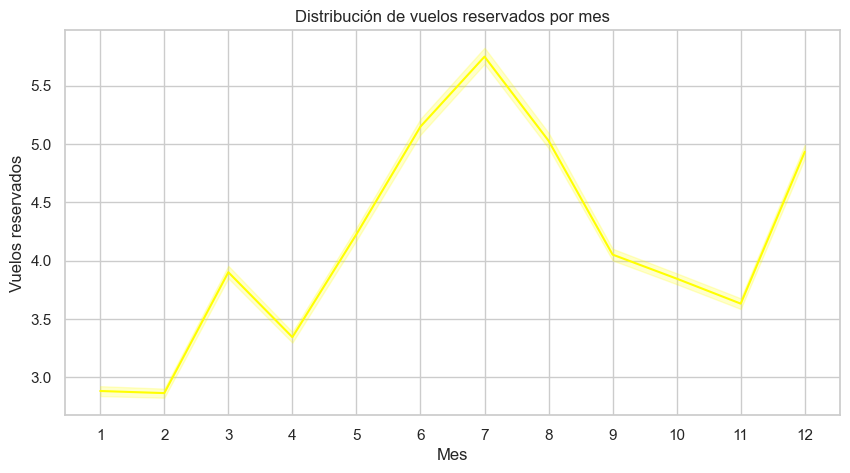

In [372]:
# Distribución de vuelos reservados por mes.
# ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
plt.figure(figsize=(10, 5)) # Crea una nueva figura con un tamaño de 10x5 pulgadas para ajustar la visualización del gráfico.
sns.lineplot(data=data_combinado, x='Month', y='Flights Booked', color="yellow") # Cuenta la cantidad de vuelos por mes.
plt.xticks(range(1, 13)) # Establece los meses en el eje x. Así se muestran todos.
plt.title("Distribución de vuelos reservados por mes")
plt.xlabel("Mes")
plt.ylabel("Vuelos reservados")
plt.show()

El gráfico muestra que la cantidad de vuelos reservados es bastante variable. Los meses con menos vuelos son enero y febrero. De febrero ha marzo aumenta, aunque de marzo a abril tiene una disminución. De abril a julio tiene un incremento notable llegando a su máxima de vuelos reservados en este último mes. De julio a septiembre disminuye notablemente, pero sigue disminuyendo hasta noiembre que vuelve a subir notablemente hasta diciembre. 

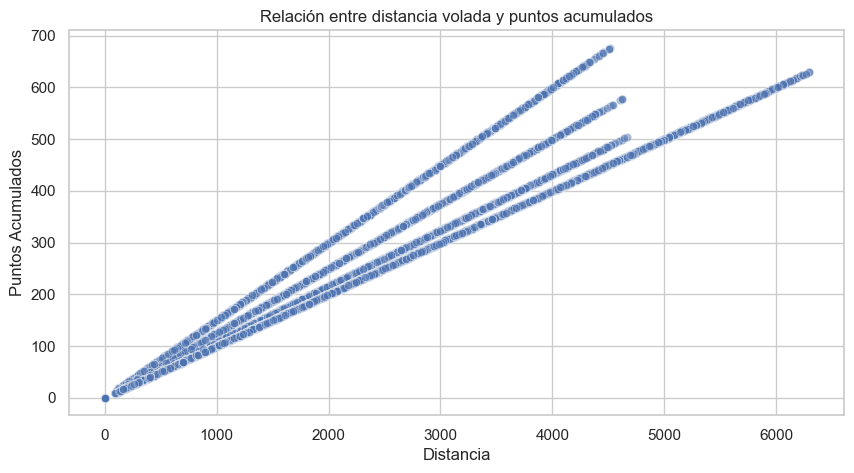

In [373]:
# Relación entre distancia y puntos acumulados.
# ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
plt.figure(figsize=(10, 5)) # Crea una nueva figura con un tamaño de 10x5 pulgadas para ajustar la visualización del gráfico.
sns.scatterplot(data=data_combinado, x='Distance', y='Points Accumulated', alpha=0.5) # Gráfica la relación entre la distancia y los puntos acumulados.
plt.title("Relación entre distancia volada y puntos acumulados")
plt.xlabel("Distancia")
plt.ylabel("Puntos Acumulados")
plt.show()

El gráfico muestra que a mayor distancia volada, más puntos acumulan los clientes. Aunque los puntos crecen de manera constante con la distancia, hay algo de variabilidad, posiblemente por factores como el tipo de vuelo o promociones. En resumen, los clientes ganan más puntos cuanto más lejos vuelan.

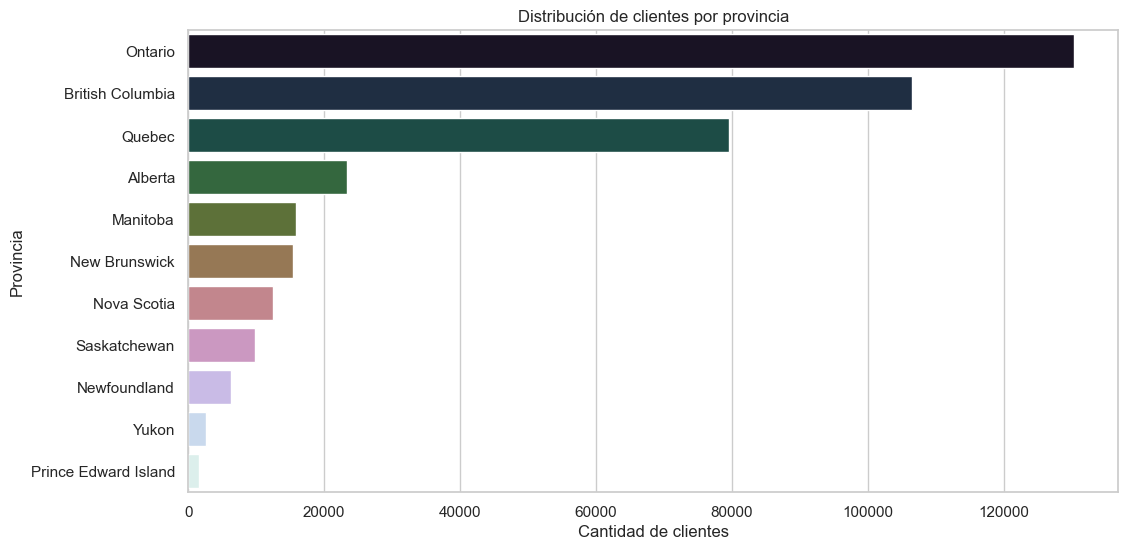

In [374]:
# Distribución de clientes por provincia/estado.
# ¿Cuál es la distribución de los clientes por provincia o estado?
plt.figure(figsize=(12, 6)) # Crea una nueva figura con un tamaño de 10x5 pulgadas para ajustar la visualización del gráfico.
sns.countplot(y=data_combinado['Province'], order=data_combinado['Province'].value_counts().index, palette="cubehelix") # Muestra la distribución de clientes por provincia ordenadas de mayor a menor en el gráfico.
plt.title("Distribución de clientes por provincia")
plt.xlabel("Cantidad de clientes")
plt.ylabel("Provincia")
plt.show()

El gráfico muestra que la mayoría de los clientes se encuentran en Ontario, British Columbia y Quebec, mientras que provincias como Prince Edward Island, Yukon y Newfoundland tienen menos clientes. Esto refleja que las provincias más grandes o pobladas tienen más clientes.

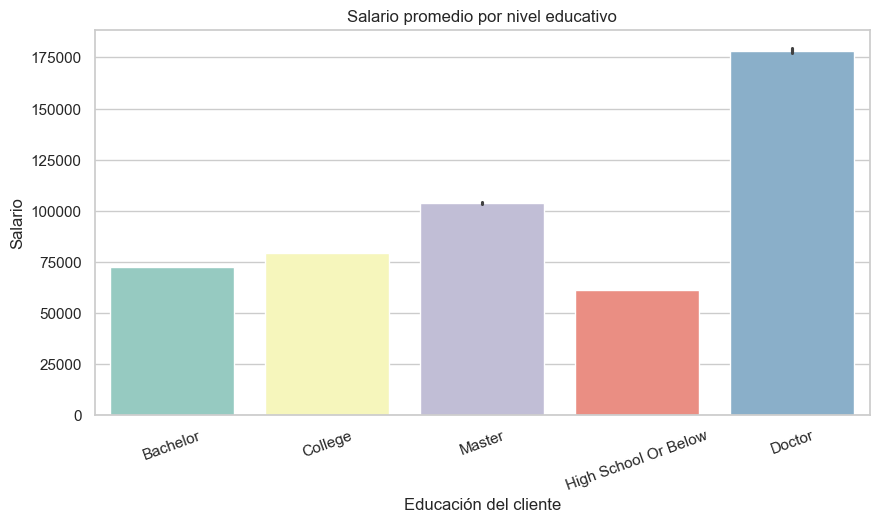

In [375]:
# Comparación de salario promedio por nivel educativo.
# ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
plt.figure(figsize=(10, 5)) # Crea una nueva figura con un tamaño de 10x5 pulgadas para ajustar la visualización del gráfico.
sns.barplot( data=data_combinado, x='Education', y='Salary', palette="Set3") # Barplot del salario por nivel educativo.
plt.title("Salario promedio por nivel educativo")
plt.xlabel("Educación del cliente")
plt.ylabel("Salario")
plt.xticks(rotation=20) # Rotar etiquetas.
plt.show()

El gráfico muestra que cuanto mayor es el nivel de educación, mayor es el salario. Por lo que hay una correlación positiva.

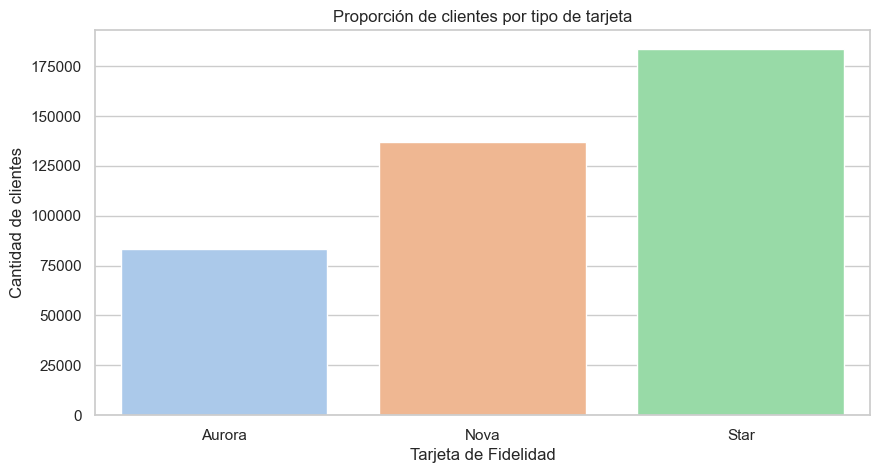

In [376]:
# Proporción de clientes según tipo de tarjeta de lealtad.
# ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
plt.figure(figsize=(10, 5)) # Crea una nueva figura con un tamaño de 10x5 pulgadas para ajustar la visualización del gráfico.
sns.countplot(data=data_combinado, x='Loyalty Card', palette="pastel") # Muestra la cantidad de clientes por tipo de tarjeta de lealtad.
plt.title("Proporción de clientes por tipo de tarjeta")
plt.xlabel("Tarjeta de Fidelidad")
plt.ylabel("Cantidad de clientes")
plt.show()

El gráfico muestra que la tarjeta más utilizada entre los clientes es la "Star", seguida de la tarjeta "Nova" y siendo la menos usada la tarjeta "Aurora".

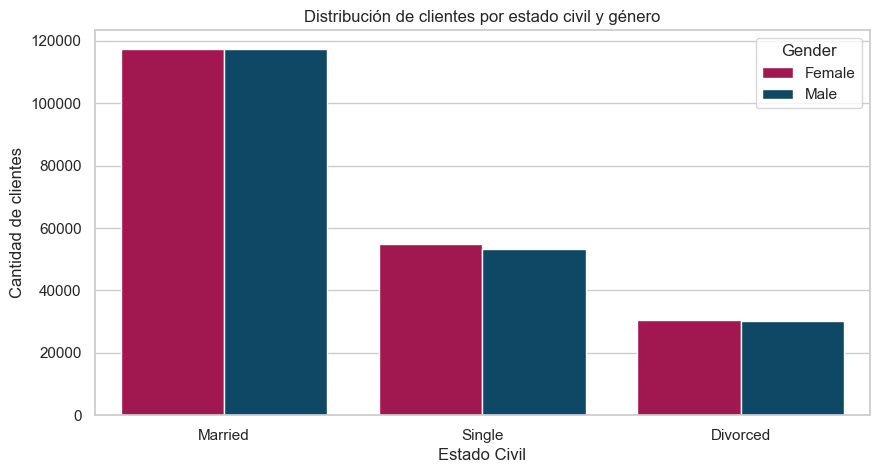

In [377]:
# Distribución de clientes según estado civil y género.
# ¿Cómo se distribuyen los clientes según su estado civil y género?
plt.figure(figsize=(10, 5)) # Crea una nueva figura con un tamaño de 10x5 pulgadas para ajustar la visualización del gráfico.
sns.countplot(data=data_combinado, x='Marital Status', hue='Gender', palette=["#B8004B", "#004D73"]) # Agrupa clientes por estado civil y género.
plt.title("Distribución de clientes por estado civil y género")
plt.xlabel("Estado Civil")
plt.ylabel("Cantidad de clientes")
plt.show()

El gráfico muestra que la cantidad de clientes casados es notablemente mayor que la de solteros o divorciados. Además de que la diferencia entre géneros no tiene apenas relevancia ya que no se ve una diferencia muy notoria.

## **Fase 3 (BONUS): Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo.**

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias
significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los
pasos que deberás seguir son:
- **Preparación de Datos:** Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
'Flights Booked' y 'Education'.
- **Análisis Descriptivo:** Agrupa los datos por nivel educativo y calcula estadísticas descriptivas
básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada
grupo.
- **Prueba Estadística:** Realiza una prueba de hipótesis para determinar si existe una diferencia
significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [378]:
# Filtrar datos relevantes para la prueba de hipótesis.
educacion_vuelos = data_combinado[['Flights Booked', 'Education']]
educacion_vuelos

,Flights Booked,Education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor
...,...,...
403755,0,College
403756,0,Doctor
403757,3,Bachelor
403758,0,College


In [379]:
# Agrupar por nivel educativo y calcular estadísticas descriptivas.
grupos_educacion = educacion_vuelos.groupby('Education')["Flights Booked"].agg(["mean", "std", "count"])  # Calcula media, desviación estándar y cantidad de datos por nivel educativo.
print(grupos_educacion)

                          mean       std   count
Education                                       
Bachelor              4.110288  5.221671  252567
College               4.169744  5.246040  102260
Doctor                4.175512  5.256971   17731
High School Or Below  4.176209  5.239267   18915
Master                4.200700  5.213956   12287
